# De opdracht

## Beschrijving 
Het doel van Bit Bikes is om in juli 2023 zo vaak mogelijk te verhuren.

Je gaat Bit Bikes voorspellingen en concrete adviezen geven om dit te bewerkstelligen. (natuurlijk met data onderbouwd)

Voor je advies en voorspellingen aan Bit Bikes behandel je minstens de volgende onderwerpen:

Membership
De fietstypes
Het bedrijf wil ook weten hoeveel fietsen ze voor komend jaar moeten hebben? Moeten er fietsen gekocht/verkocht worden?

De eerste stap is het exploreren van je data. Per onderwerp kan je bekijken hoe je dat wil visualiseren.

Maak een of meerdere visualisaties per onderwerp, geef bij al je visualisaties aan waarom je voor deze visualisatie hebt gekozen.
Schrijf vervolgens per onderwerp jouw interpretatie van de data. Wat blijkt er uit de data?
Maak tot slot je advies op voor Bit Bikes en presenteer dit aan het einde van je notebook.


## Doel

Het doel van Bit Bikes is om in juli 2023 zo vaak mogelijk te verhuren.

Je gaat Bit Bikes voorspellingen en concrete adviezen geven om dit te bewerkstelligen. (natuurlijk met data onderbouwd)

Voor je advies en voorspellingen aan Bit Bikes behandel je minstens de volgende onderwerpen:

Membership
De fietstypes
Het bedrijf wil ook weten hoeveel fietsen ze voor komend jaar moeten hebben? Moeten er fietsen gekocht/verkocht worden?

De eerste stap is het exploreren van je data. Per onderwerp kan je bekijken hoe je dat wil visualiseren.

Maak een of meerdere visualisaties per onderwerp, geef bij al je visualisaties aan waarom je voor deze visualisatie hebt gekozen.
Schrijf vervolgens per onderwerp jouw interpretatie van de data. Wat blijkt er uit de data?
Maak tot slot je advies op voor Bit Bikes en presenteer dit aan het einde van je notebook.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lees de data in
df_2020 = pd.read_csv('divvy-tripdata/202007-divvy-tripdata.csv')
df_2020['year'] = 2020

df_2021 = pd.read_csv('divvy-tripdata/202107-divvy-tripdata.csv')
df_2021['year'] = 2021

df_2022 = pd.read_csv('divvy-tripdata/202207-divvy-tripdata.csv')
df_2022['year'] = 2022

#Data cleaning (date converting)
df_2020[['started_at', 'ended_at']] = df_2020[['started_at', 'ended_at']].apply(pd.to_datetime, format='%d/%m/%Y %H:%M') 
df_2021[['started_at', 'ended_at']] = df_2021[['started_at', 'ended_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S') 
df_2022[['started_at', 'ended_at']] = df_2022[['started_at', 'ended_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S') 
#df_2020['started_at'] = pd.to_datetime(df_2020['started_at'], format='%d/%m/%Y %H:%M')
#df_2020.sort_values(by=['started_at'], inplace=True, ascending=True)

df_all = pd.concat([df_2020, df_2021, df_2022])

df_all.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2197378 entries, 0 to 823487
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year                int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 251.5+ MB


# Memberships

## Verdeling over de jaren heen

Laten we eens een kijkje nemen naar de aantal ritten die in de afgelopen jaren van Juli zijn gemaakt en de verdeling ervan tussen klanten met een membership en zonder

Text(0, 0.5, 'Aantal ritten')

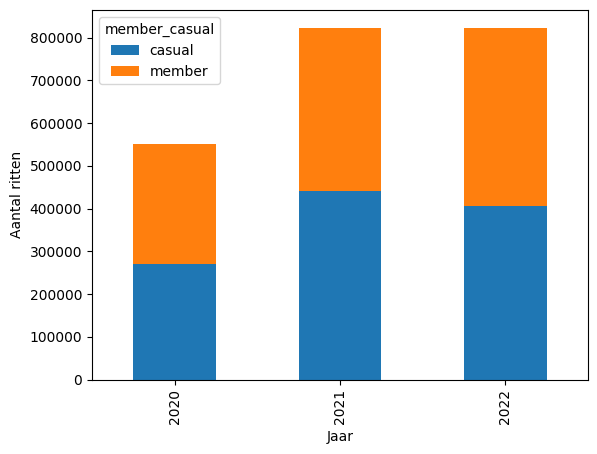

In [23]:
df_all.groupby(['year', 'member_casual']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.xlabel('Jaar')
plt.ylabel('Aantal ritten')

De verdeling over de membership is over de 3 jaar redelijk gebleven op 50%, met een lichte daling in 2021 en een lichte stijging in 2022. Wel opmerkelijk is de 45% stijging in het aantal ritten van 2020 naar 2021. Maar omdat het in 2022 gelijk is gebleven. Met alleen drie maanden uit elk jaar is het moeilijk vast te stellen wat de trend momenteel is bij de aantal ritten. 

### Verdeling membership over de populaire stations

Dus lijkt het me dat we moeten gaan visualieren waar de meeste members aan hun ritten beginnen. Om dit te doen pakken we de top 20 stations waar de ritten beginnen. Van deze top 20 verwijderen we wel de volgende stations:

| Station                  | Reden voor uitsluiting         |
|--------------------------|--------------------------------|
| DuSable Lake Shore Dr & North Blvd       | Deze station ontbreekt in 2020 |
| Lake ShoreDr & Monroe St   | Deze station ontbreekt in 2022 |
| Lake ShoreDr & North Blvd  | Deze station ontbreekt in 2022 |



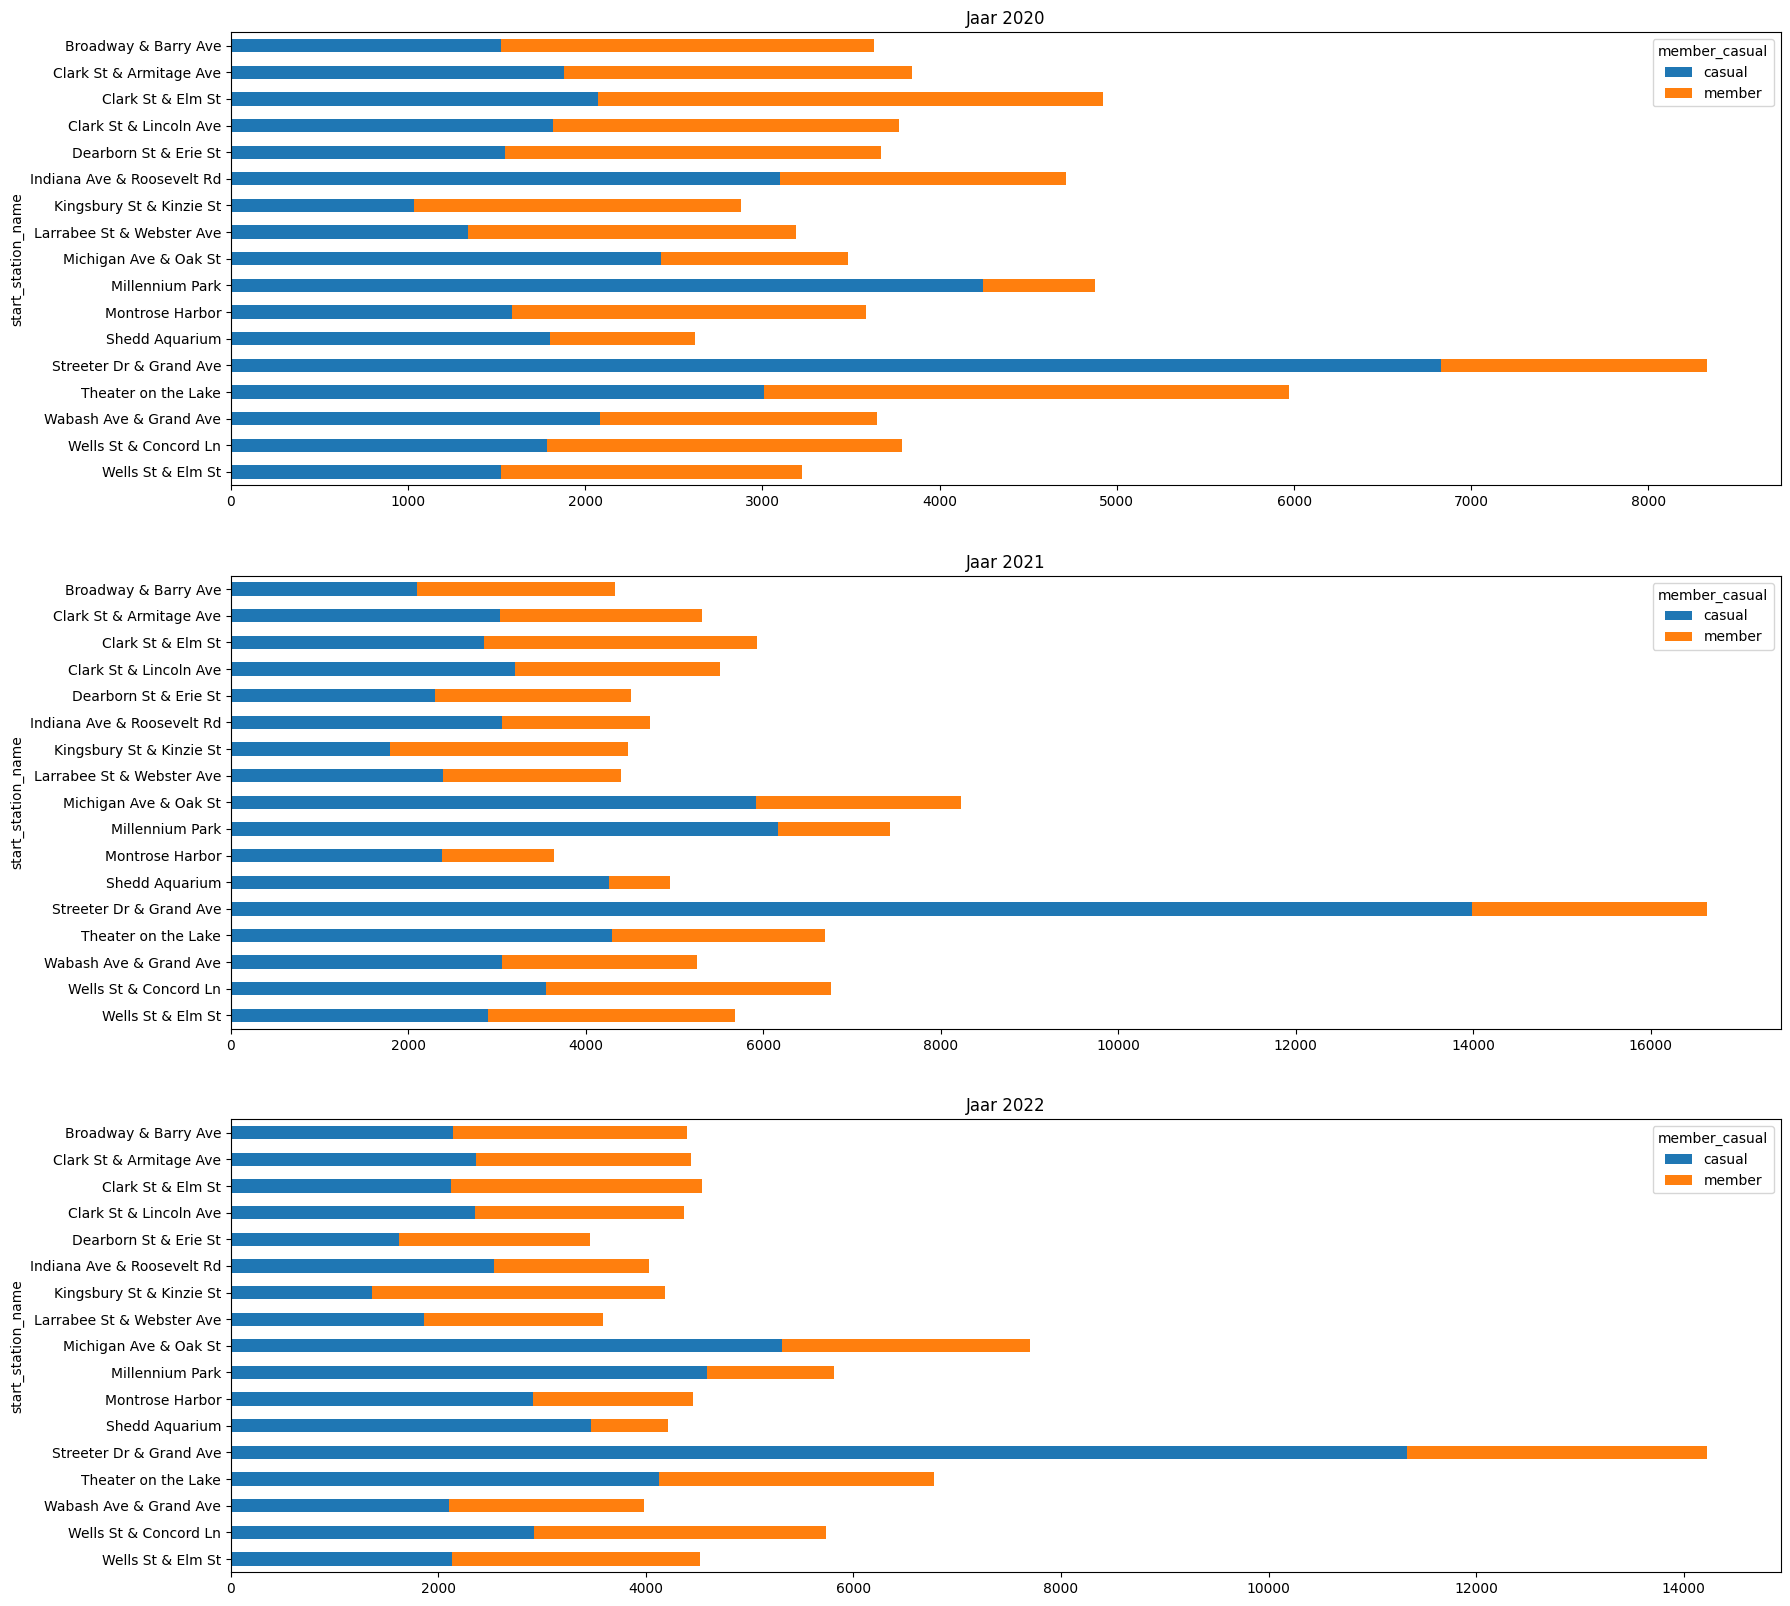

In [24]:
top20_stations = df_all.groupby('start_station_name')['start_station_name'].value_counts().nlargest(20)


df_top20_sname_year = df_all[df_all["start_station_name"].isin(top20_stations.index)][['start_station_name', 'member_casual', 'year']]
df_top20_sname_year.drop(df_top20_sname_year[df_top20_sname_year['start_station_name'].isin(['DuSable Lake Shore Dr & North Blvd', 'Lake Shore Dr & Monroe St', 'Lake Shore Dr & North Blvd'])].index, inplace=True)


fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=1)

for i in range(2020, 2023):
    df_top20_sname_year[df_top20_sname_year['year'] == i].groupby(['start_station_name', 'member_casual']).size().unstack(fill_value=0).iloc[::-1].plot(kind='barh', stacked=True, ax=ax[(i-2020)])
    ax[(i-2020)].set_title(f"Jaar {i}")

Wat opvalt is:

- In 2020 waren de top plaatsen een stuk populairder dan de jaren erna
- Er zijn een paar stations met een overheersende aantal non-members zoals:
    - Michigan Ave & Oak st
    - Millenium Park
    - Shedd Aquarium
    - Streeter Dr & Grand Ave
- In het algemeen gaat de verhouding van members t.o.v non-members of achteruit of het blijft het gelijk.
    - Dit hint dat de huidige abbonement niet aantrekkelijk genoeg blijft voor onze leden

Dat de aantal ritten gemaakt in de top 20 plaatsen achteruit gaat, maakt het waard om te zien hoeveel % van de aantal ritten  nu  uit de top 17 stations bestaat.

In [25]:
print(f"De top 17 stations leverde {round((df_top20_sname_year[df_top20_sname_year['year'] == 2020].shape[0] / df_2020.shape[0] * 100), 2)}% van alle ritten in 2020 op.")
print(f"De top 17 stations leverde {round((df_top20_sname_year[df_top20_sname_year['year'] == 2021].shape[0] / df_2021.shape[0] * 100), 2)}% van alle ritten in 2021 op.")
print(f"De top 17 stations leverde {round((df_top20_sname_year[df_top20_sname_year['year'] == 2022].shape[0] / df_2022.shape[0] * 100), 2)}% van alle ritten in 2022 op.")

De top 17 stations leverde 12.72% van alle ritten in 2020 op.
De top 17 stations leverde 12.7% van alle ritten in 2021 op.
De top 17 stations leverde 10.98% van alle ritten in 2022 op.


Conclusies die wij hieruit trekken zijn:

Sinds 2022 zijn de aantal gemaakte ritten meer verspreid door het land heen. Dit kan betekenen dat de vraag naar meer bit bikes verspreid is tussen de stations. Wij stellen voor om ze te plaatsen in de stations waar ze onderbezet zijn, i.p.v de populairdere stations.

Bij de eerder genoemde stations waar de non-members overheersen, stellen wij voor om een enquete te houden waarom onze klanten er niet voor kiezen om bij ons een membership te nemen. Dit kan onze stabiele inkomen verhogen omdat wij vanzelfsprekend bij populaire stations al veel klanten hebben en ze een lidmaatschap verkopen zou dat verbeteren. 



# Fiets types

Momenteel 

In [26]:
#pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D')
#plt.figure(figsize=(10, 10))

"""
sns.histplot(
    x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), 
    y=df_all.groupby(df_all['started_at'].dt.date)['started_at'].size())
"""

"\nsns.histplot(\n    x=pd.date_range(start=df_all['started_at'].min(), end=df_all['started_at'].max(), freq='1D'), \n    y=df_all.groupby(df_all['started_at'].dt.date)['started_at'].size())\n"